 Linear regression with Python

  Linear regression is the process of fitting a linear equation to a set of sample data, in order to predict the output.

 In order to do this, we assume that the input X, and the output Y have a linear relationship.

 X and Y may or may not have a linear relationship. We just want to find the closest linear relationship between them, in order to explain the data that we observe.

 We can get a better understanding of linear regression from the following chart:

 The line is the linear relationship that we predicted based on the points which we observed.

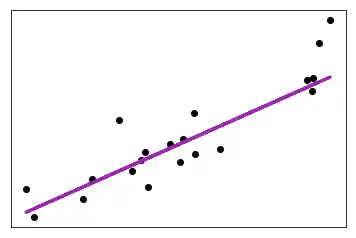

In [137]:
from google.colab import files
from IPython.display import Image
Image("sample-reg-plot.png", width=600)

 If you want to get a brief recap of the theory behind linear regression, you can see my notes here

 In order to perform linear regression with python, we will need to:
 
1.Generate the sample data, and divide it into training and testing data.
 
2.Create a linear regression model.
 
3.Fit our model using the training data
 
4.Test our model using the testing data

 Generating our data
 
Instead of using a popular sample dataset, let’s generate our own data instead. This will help us understand the values of the sample data better than if we took a real life dataset, and will also help us judge the accuracy of our model better, as you will see in the later sections.
 
Let’s assume there is only one predictor variable. In that case the linear relationship will be of the form:
 
          y=β0​+β1​x1​+ϵ
 
If we normalize our data,so that β0​=0,we will get the simplified form of the above equation:
 
           y=βx+ϵ
 
Here, ϵ is a random value that represents the irreducible error that occurs with each measurement of y
Lets write a function to generate this data for us:

In [138]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
 
def generate_dataset_simple(beta, n, std_dev):
  # Generate x as an array of `n` samples which can take a value between 0 and 100
  x = np.random.rand(n) * 100
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  # Calculate `y` according to the equation discussed
  y = x * beta + e

 We can then create the required number of samples, and then separate them into training and testing sets:

In [140]:
 x, y = generate_dataset_simple(10, 50, 100)
 
# Take the first 40 samples to train, and the last 10 to test
x_train = x[:-10]
y_train = y[:-10]
 
x_test = x[-10:]
y_test = y[-10:]

TypeError: ignored

Now that we have our data, let’s use scikit learn’s LinearRegression model to predict the coefficients from the raw data using the ordinary least squares method of regression:

In [ ]:
 
# Import, and create an instance of a simple least squares regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
 
model = linear_model.LinearRegression()
 
# Train the model using the training data that we created
model.fit(x_train, y_train)
# Now that we have trained the model, we can print the coefficient of x that it has predicted
print('Coefficient: \n', model.coef_)
 
# We then use the model to make predictions based on the test values of x
y_pred = model.predict(x_test)
 
# Now, we can calculate the models accuracy metrics based on what the actual value of y was
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))

Coefficient: 
 [10.33188758]


ValueError: ignored

ValueError: ignored

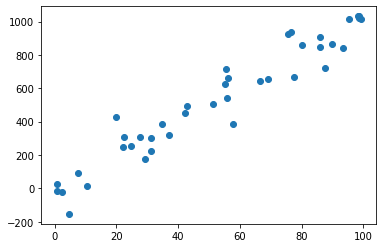

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
x_actual = np.array([0, 100])
y_actual = x_actual * beta
plt.plot(x_actual, y_actual, color='green')
plt.show()

In [ ]:
 def generate_dataset(coeffs, n, std_dev):
  # We calculate the number of predictors, and create a coefficient matrix
  # With `p` rows and 1 column, for matrix multiplication
  p = len(coeffs)
  coeff_mat = np.array(coeffs).reshape(p, 1)
  # Similar as before, but with `n` rows and `p` columns this time
  x = np.random.random_sample((n, p))* 100
  e = np.random.randn(n) * std_dev
  # Since x is a n*p matrix, and coefficients is a p*1 matrix
  # we can use matrix multiplication to get the value of y for each
  # set of values x1, x2 .. xp
  # We need to transpose it to get a 1*n array from a n*1 matrix to use in the regression model
  y = np.matmul(x, coeff_mat).transpose() + e
  return x, y

In [ ]:
 
# We now have an array of coefficients, instead of a single one
x, y = generate_dataset_simple(10, 50, 100)

TypeError: ignored

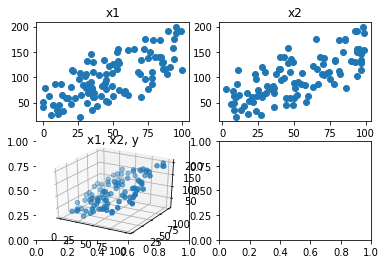

In [ ]:
 from mpl_toolkits.mplot3d import Axes3D
from generate_dataset import generate_dataset as gd
from matplotlib import pyplot as plt
 
predictor_coeffs =[1, 1]
std_dev = 10
n = 100
 
X, Y = gd(predictor_coeffs, n, std_dev)
 
f, [[p1, p2], [p3, p4]] = plt.subplots(2,2)
 
p1.scatter(X[:,0], Y)
p1.set_title("x1")
 
p2.scatter(X[:,1], Y)
p2.set_title("x2")
 
p3 = f.add_subplot(223, projection='3d')
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title("x1, x2, y")
 
plt.show()